# Doctor Consultation Fees Project

## Data Description
To build a model to predict the doctor’s consulting fees using the provided Datasets

Import required libraries

In [67]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [68]:
df=pd.read_csv('Final_test1.csv')

In [69]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


This is the test data set

In [70]:
d=pd.read_csv('Sample_submission.csv')

In [71]:
d.head()

,Fees
0,1747
1,1725
2,2194
3,2193
4,2091


This the sample value of test dataset

In [72]:
dg=pd.read_excel(r"C:\Users\jothu\Downloads\Final-Train.xlsx")

In [73]:
dg.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


This is the dataset which we are going to use to build a model because it has x and y variable. This is Train data set

## EDA

In [7]:
dg.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

These are the datatypes of each columns which includes integer and object values 

In [8]:
dg.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

These are the columns of data

In [9]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [10]:
dg.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

The data has null values

In [11]:
dg.describe(include='all')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961,5961,2659,5936,5961,3341,5961.000000
unique,1420,64,51,877,6,2998,NaN
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,NaN
freq,488,323,684,75,1397,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,307.944640
std,NaN,NaN,NaN,NaN,NaN,NaN,190.920373
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,150.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,500.000000


Since all the data is in object format the mean difference and standard deviation cannot be observed

In [13]:
dg.Fees.unique()

array([100, 350, 300, 250, 200, 700, 500, 400, 150, 650, 600,  50, 800,
       750, 450,  80,  60, 550, 900, 950, 430, 130, 630, 499, 260,  70,
        10, 299, 230, 380,   5, 280,  40,  30, 180, 920, 125, 850,  20,
       220], dtype=int64)

There are Fees from 5 to 950. Where 5 being the lowest and 950 being the highest.

In [14]:
dg.Qualification.unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

## Converting data types & Replacing NaN values

In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Qualification','Experience','Rating','Place','Profile','Miscellaneous_Info']
for val in list1:
    dg[val]=le.fit_transform(dg[val].astype(str))
    
    dg=dg.replace(np.nan,dg.mean())
    

We have converted our data into integer format the same we will be doing for test dataset

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Qualification','Experience','Rating','Place','Profile','Miscellaneous_Info']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
    df=df.replace(np.nan,df.mean())

We have converted data type and replaced nan values in test data set

In [17]:
dg.dtypes

Qualification         int32
Experience            int32
Rating                int32
Place                 int32
Profile               int32
Miscellaneous_Info    int32
Fees                  int64
dtype: object

All the data converted into integer 

In [18]:
dg.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,86,2,49,70,3,1385,300
5957,972,19,51,541,4,2992,100
5958,972,29,48,216,4,1173,600
5959,1358,56,41,850,4,2202,100
5960,581,62,0,603,1,1595,200


In [76]:
df.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
1982,17,1,36,58,0,1084
1983,548,33,36,96,2,1084
1984,474,56,36,424,4,1084
1985,51,3,34,26,1,975
1986,384,55,36,394,2,9


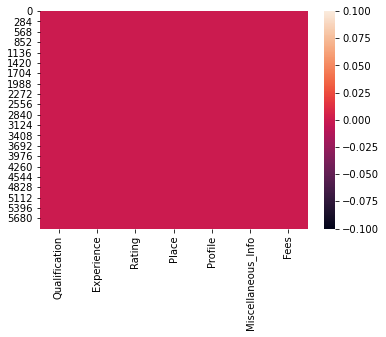

In [19]:
sns.heatmap(dg.isnull())

There are no missing data or null values 

In [20]:
dgcor=dg.corr()
dgcor

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
Qualification,1.000000,-0.017526,-0.010269,0.012381,0.315093,-0.085572,0.105693
Experience,-0.017526,1.000000,-0.043765,-0.015241,-0.058473,-0.024917,-0.003907
Rating,-0.010269,-0.043765,1.000000,0.024444,0.046574,0.497669,-0.071205
Place,0.012381,-0.015241,0.024444,1.000000,0.016631,0.050020,-0.063510
Profile,0.315093,-0.058473,0.046574,0.016631,1.000000,0.019585,0.145226
Miscellaneous_Info,-0.085572,-0.024917,0.497669,0.050020,0.019585,1.000000,-0.162545
Fees,0.105693,-0.003907,-0.071205,-0.063510,0.145226,-0.162545,1.000000


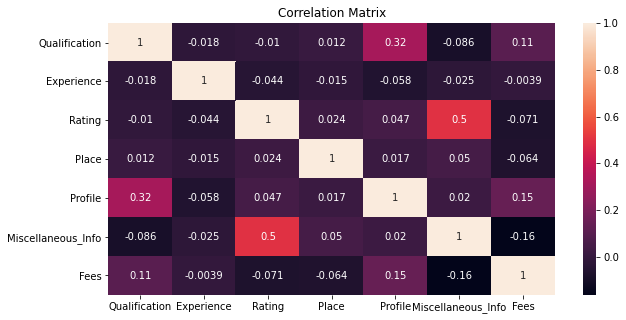

In [22]:
plt.figure(figsize=[10,5])
sns.heatmap(dgcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

Miscellaneous_Info and Fees are negatively correlated to each other

Ratings and Miscellaneous_Info are positively correlated to each other

Profile and Qualification are also positively correlated with each other

Fees is positively correlated with Profile and Qualification

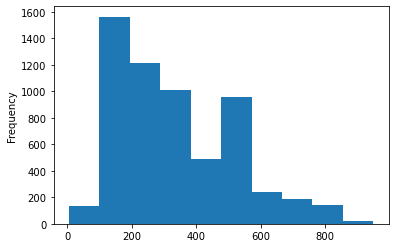

In [23]:
dg['Fees'].plot.hist()

100 to 200 has the highest frequency

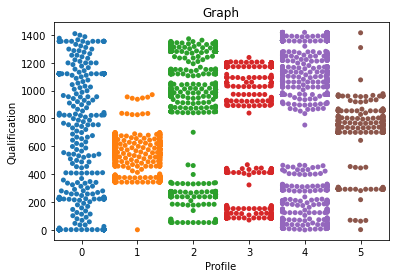

In [24]:
ax=sns.swarmplot(x='Profile',y='Qualification',data=dg)
plt.title('Graph')
plt.show()

This shows the relation between Profile and Qualification

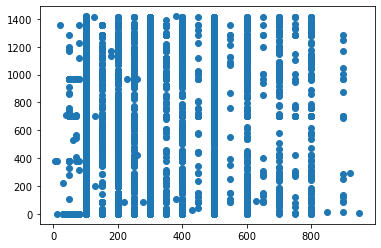

In [26]:
plt.scatter(dg['Fees'],dg['Qualification'])

The scatter plot stating the relation of Fees and Qualification 

In [27]:
dg.shape

(5961, 7)

There are only 7 columns

In [77]:
df.shape

(1987, 6)

There are 6 columns because test data does not have target variable

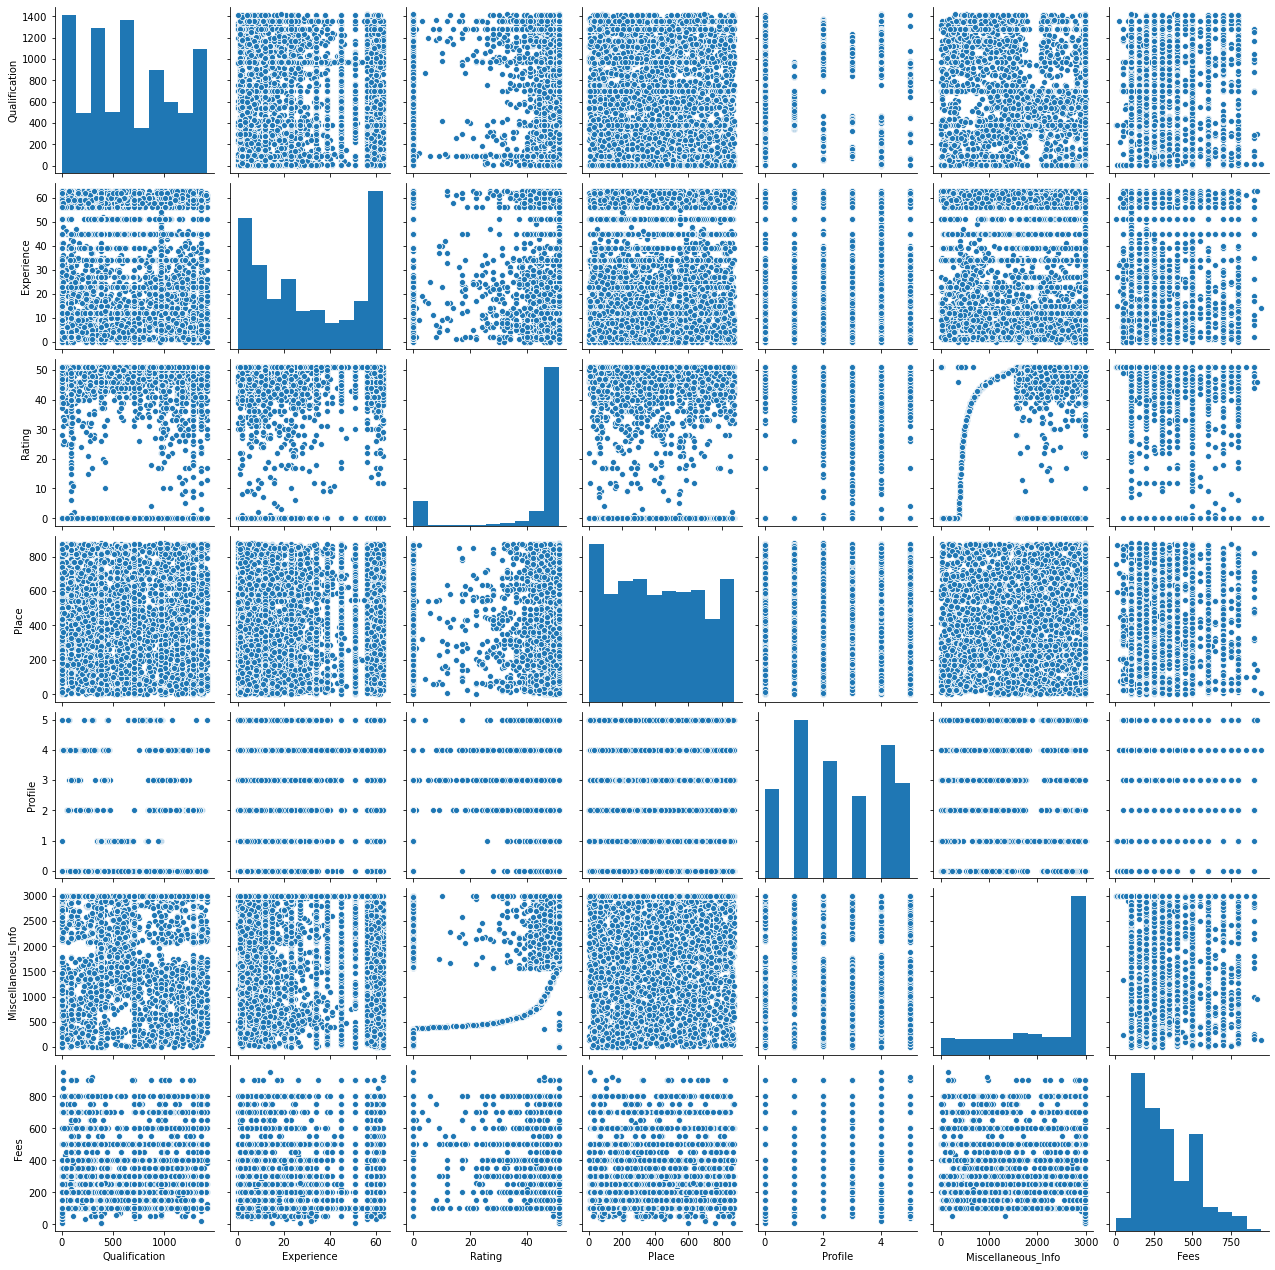

In [28]:
sns.pairplot(dg)

Qualification            AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Experience            AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Rating                AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Place                 AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Profile               AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Miscellaneous_Info    AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Fees                  AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
dtype: object

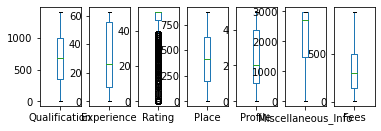

In [31]:
dg.plot(kind='box',subplots=True, layout=(2,7))

There are few outliers in Rating

In [38]:
collist=dg.columns.values
ncol=40
nrows=7

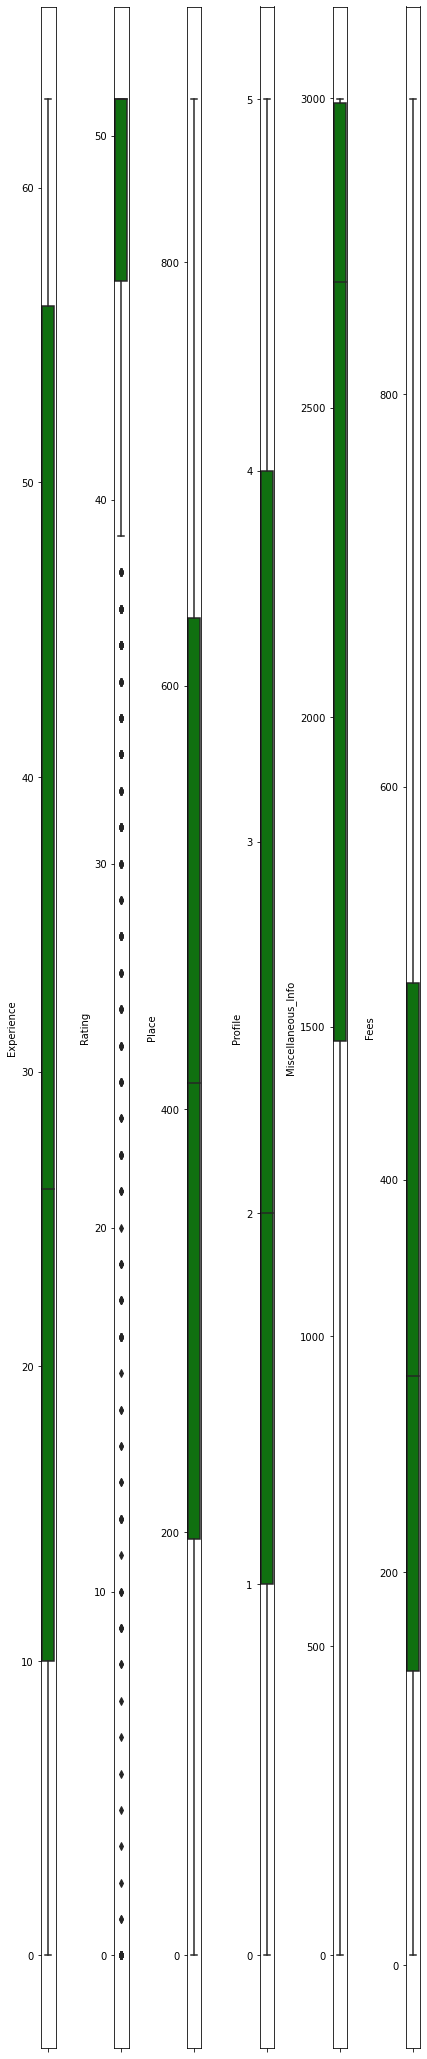

In [39]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(dg[collist[i]],color='green',orient='v')
    plt.tight_layout()

## Checking Outliers using boxplot

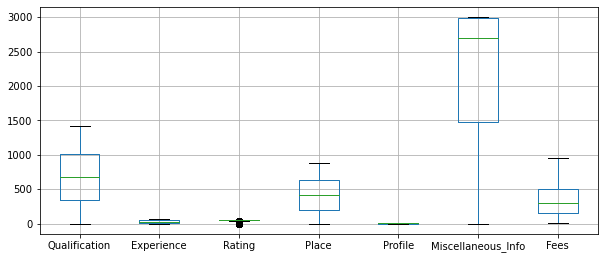

In [41]:
dg.iloc[:,0:7].boxplot(figsize=[10,5])
plt.subplots_adjust(bottom=0.25)
plt.show()

Checked outliers in train data

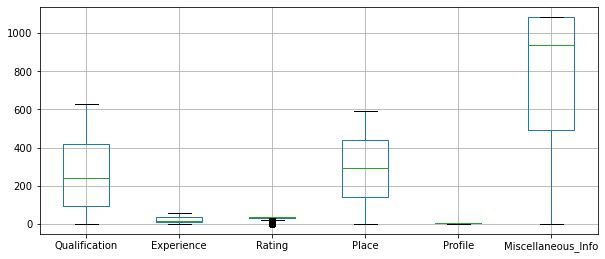

In [78]:
df.iloc[:,0:7].boxplot(figsize=[10,5])
plt.subplots_adjust(bottom=0.25)
plt.show()

Checked outliers in test data

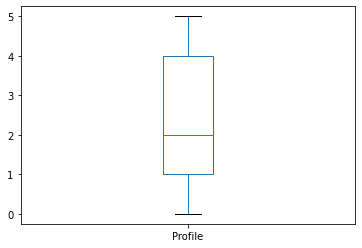

In [42]:
dg['Profile'].plot.box()

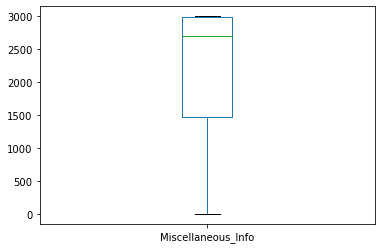

In [43]:
dg['Miscellaneous_Info'].plot.box()

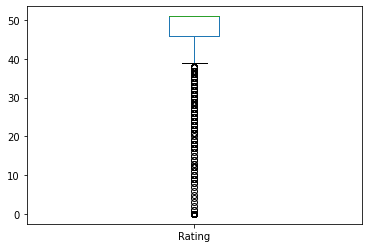

In [45]:
dg['Rating'].plot.box()

Outliers are only present in Rating column

## Removing Outliers

In [84]:
from scipy.stats import zscore
z=np.abs(zscore(dg))
z

array([[4.73305738e-01, 3.34882629e-01, 2.61246491e+00, ...,
        1.54301587e+00, 2.14799606e+00, 1.08926083e+00],
       [1.26594438e+00, 9.55840219e-01, 3.79506009e-01, ...,
        1.47289258e+00, 7.99077151e-01, 2.20295441e-01],
       [1.30046489e+00, 1.91011789e+00, 5.01627271e-01, ...,
        3.36652489e-01, 8.40089014e-01, 4.16158134e-02],
       ...,
       [2.07239780e-03, 5.72670771e-01, 3.18445378e-01, ...,
        9.39834180e-01, 1.05904682e+00, 1.52985171e+00],
       [8.36481290e-01, 8.12542314e-01, 1.08979039e-01, ...,
        9.39834180e-01, 1.52856571e-02, 1.08926083e+00],
       [8.55125573e-01, 7.17010377e-01, 2.61246491e+00, ...,
        8.69710893e-01, 6.18455656e-01, 5.65438323e-01]])

In [85]:
threshold=3
print(np.where(z>3))

(array([ 275,  293,  987, 1314, 1631, 2165, 2252, 2393, 2428, 2522, 2623,
       2708, 3365, 4040, 4581, 4730, 4835, 5195, 5250, 5311], dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
      dtype=int64))


In [86]:
dg_new=dg[(z<3).all(axis=1)]

In [87]:
dg.shape

(5961, 7)

In [88]:
dg_new.shape

(5941, 7)

In [89]:
loss_percent=(5961-5941)/5961*100
print(loss_percent)

0.33551417547391377


Only 0.33 percent data is lost after outlier removal

Removed outliers from Train data

In [79]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.1020893 , 0.32585765, 0.55106606, 0.85310936, 0.90167305,
        0.86945243],
       [0.43041389, 0.11273087, 0.55106606, 1.66107466, 0.29700739,
        0.86945243],
       [0.01064936, 0.64554782, 1.75215481, 0.45129913, 0.30765827,
        1.7698564 ],
       ...,
       [1.1511758 , 1.81774509, 0.55106606, 0.76561186, 0.90167305,
        0.86945243],
       [1.12406513, 1.00618471, 0.38045711, 1.51896632, 0.91232393,
        0.56044635],
       [0.66708198, 1.7644634 , 0.55106606, 0.59340747, 0.30765827,
        2.17808462]])

In [80]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


There are no outliers in Test data

## Checking skewness

In [90]:
x=dg_new.drop("Fees",axis=1)

In [91]:
x.skew()

Qualification         0.242035
Experience            0.825063
Rating               -2.053463
Place                 0.117122
Profile               0.111080
Miscellaneous_Info   -0.824806
dtype: float64

There is skewness in Rating, and Miscellaneous_Info

Checked skewness for train data

In [81]:
df.skew()

Qualification         0.280822
Experience            0.687595
Rating               -1.857728
Place                 0.043620
Profile               0.028926
Miscellaneous_Info   -0.750800
dtype: float64

There is some skewness in Rating and Miscellaneous_Info

## Removing skewness

In [92]:
from sklearn.preprocessing import power_transform
dg_fees=power_transform(x)
dg_fees=pd.DataFrame(dg_fees,columns=x.columns)

In [93]:
dg_fees.skew()

Qualification        -0.298158
Experience           -0.066462
Rating               -1.782143
Place                -0.266725
Profile              -0.138544
Miscellaneous_Info   -0.654804
dtype: float64

Skewness is removed from Train data

In [82]:
from sklearn.preprocessing import power_transform
df_test=power_transform(df)
df_test=pd.DataFrame(df_test,columns=df.columns)

In [83]:
df_test.skew()

Qualification        -0.264189
Experience           -0.091812
Rating               -1.532964
Place                -0.284546
Profile              -0.162395
Miscellaneous_Info   -0.621352
dtype: float64

Skewness removed from Test data

In [113]:
x=dg_fees

In [114]:
x.shape

(5941, 6)

In [115]:
x.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
5936,1.076732,-0.371639,0.356297,-1.446301,0.420808,-0.945510
5937,0.188121,0.500162,0.565936,0.553830,0.941458,0.875686
5938,0.188121,0.810129,0.254028,-0.659815,0.941458,-1.147868
5939,0.853712,-0.760666,-0.413670,1.463929,0.941458,-0.075479
5940,-0.714327,-0.548211,-2.466186,0.749350,-0.820095,-0.734731


In [119]:
y=dg_new["Fees"]

In [120]:
y.shape

(5941,)

## Creating train-test split

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=23)

In [128]:
from sklearn.linear_model import Lasso,Ridge

In [131]:
from sklearn.ensemble import AdaBoostRegressor

In [132]:
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),SVR(),Lasso(),Ridge(),AdaBoostRegressor()]

In [133]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Mean squared error',mean_squared_error(y_test,predm))
    print('Square root of Mean squared error',np.sqrt(mean_squared_error(y_test,predm)))
    print('Mean absolute error',mean_absolute_error(y_test,predm))
    print('Print R2 score',r2_score(y_test,predm)) 
    print('\n')

Mean squared error 31288.929296420694
Square root of Mean squared error 176.8867697042961
Mean absolute error 144.33030720786667
Print R2 score 0.10637639326347259


Mean squared error 55885.46045989905
Square root of Mean squared error 236.4010584999548
Mean absolute error 173.99551318003364
Print R2 score -0.5961098018786966


Mean squared error 29779.18251179634
Square root of Mean squared error 172.56645824666026
Mean absolute error 134.7615779985578
Print R2 score 0.14949533012940186


Mean squared error 32333.619002257412
Square root of Mean squared error 179.81551379749584
Mean absolute error 142.49099395614854
Print R2 score 0.07653966174715554


Mean squared error 31303.6021763312
Square root of Mean squared error 176.92824018887205
Mean absolute error 144.44748828379352
Print R2 score 0.10595733028619347


Mean squared error 31289.019048940638
Square root of Mean squared error 176.88702340460318
Mean absolute error 144.3312683235625
Print R2 score 0.10637382989769473


Mean s

## Saving the best Model

In [134]:
import joblib
joblib.dump(AdaBoostRegressor(),"Doctor_Fees.pkl")

['Doctor_Fees.pkl']

In [137]:
mod=joblib.load('Doctor_Fees.pkl')

In [ ]:
predicted_values=mod.predict('Final_test1.csv') # get the prediction

In [ ]:
predicted_values.to_csv('Results.csv') # Save the prediction